In [2]:
#linear regression implementation on appliance-energy dataset
import pandas as pd
import matplotlib.pyplot as plt
energy = pd.read_csv('appliance-energy.csv')
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [3]:
energy.isna().sum()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64

In [4]:
X = energy[['Temperature (°C)']]
y = energy['Energy Consumption (kWh)']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.6119478445218715


In [9]:
import joblib as jb

In [10]:
jb.dump(lr, 'energy_model.pkl')

['energy_model.pkl']

In [11]:
#load the model
loaded_model = jb.load('energy_model.pkl')
# Make predictions with the loaded model
loaded_predictions = loaded_model.predict(X_test)

Predicted energy consumption for 25°C: 4.270442145949698 kWh


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


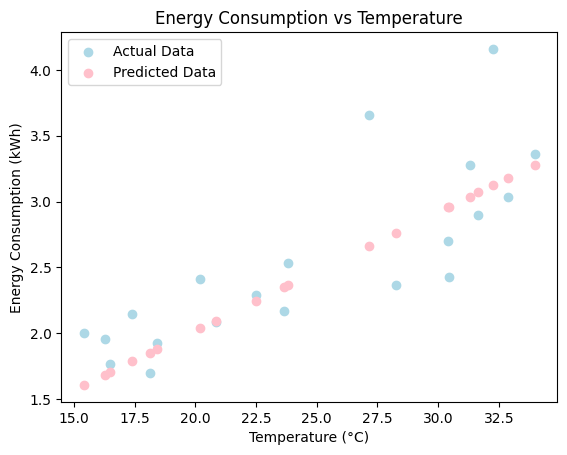

In [13]:
import numpy as np
exp = float(input("Enter temperature in Celsius: "))
new_data = np.array([[exp]])
new_prediction = loaded_model.predict(new_data)
print(f"Predicted energy consumption for 25°C: {new_prediction[0]} kWh")

# Visualizing the results
plt.scatter(X_test, y_test, color='lightblue', label='Actual Data')
plt.scatter(X_test, y_pred, color='pink', label='Predicted Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption vs Temperature')
plt.legend()
plt.show()